# Business Understanding 

# Problem Definition 

## Context

Vaccination is a cornerstone of public health, protecting individuals and communities through both direct immunity and herd immunity. Insights from past campaigns, such as the 2009 H1N1 influenza pandemic, can guide current and future vaccination efforts, including for emerging diseases like COVID-19. Understanding factors influencing vaccine uptake helps public health authorities design targeted interventions to improve coverage.

### Stakeholder
Public health authorities, such as the CDC, are responsible for monitoring vaccine coverage and planning immunization campaigns. Predictive insights from this analysis can help identify populations less likely to get vaccinated and guide resource allocation.

### Problem Statement
This project aims to predict whether an individual received the H1N1 or seasonal flu vaccine based on demographic, behavioral, and opinion-based survey responses. By modeling vaccination likelihood, I can:

1. Identify key factors associated with vaccine uptake.
2. Predict vaccination probability for individuals or populations.
3. Inform targeted public health messaging and interventions.

### Scope and Evaluation
The analysis focuses on one vaccine type (H1N1 or seasonal) and includes:
1. Exploratory Data Analysis (EDA) to understand distributions and relationships.
2. Feature engineering and preprocessing to prepare the data for modeling.
3. Model training using classification algorithms.
4. Evaluation using accuracy, precision, recall, F1-score, and primarily ROC-AUC to measure predictive performance.

### Business Value
Predictive insights enable public health officials to:
1. Identify groups with lower vaccination rates.
2. Design more effective, data-driven vaccination campaigns.
3. Allocate resources efficiently to increase overall vaccine coverage.

In [211]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score

In [212]:
# Load CSV files from the data folder
train_features = pd.read_csv('data/training_set_features.csv')
print(train_features.shape)

(26707, 36)


In [213]:
train_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [214]:
train_labels = pd.read_csv('data/training_set_labels.csv')
print(train_labels.shape)

(26707, 3)


In [215]:
train_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [216]:
test_features = pd.read_csv('data/test_set_features.csv')
print(test_features.shape)

(26708, 36)


In [217]:
test_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [218]:
submission_format = pd.read_csv('data/submission_format.csv')
submission_format.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


In [219]:
print(submission_format.shape)

(26708, 3)


# Exploratory Data Analysis (EDA)

In [220]:
# Check data types
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [221]:
# Check missing values
train_features.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [222]:
# Check target distribution
train_labels['h1n1_vaccine'].value_counts()
train_labels['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

In [223]:
# Quick statistics
train_features.describe(include='all')

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,22284,25299,24665,25244,26707,26707,26458.000000,26458.000000,13377,13237
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,2,2,3,10,3,NaN,NaN,21,23
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",NaN,NaN,fcxhlnwr,xtkaffoo
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12777,13555,18736,13560,4297,11645,NaN,NaN,2468,1778
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,NaN,NaN
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN


In [224]:
# merging training_set_features.csv and training_set_labels.csv into one dataframe for cleaning and EDA.
# Merge on respondent_id
train = train_features.merge(train_labels, on='respondent_id')

In [225]:
train.shape

(26707, 38)

In [226]:
train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [227]:
#Remove whitespaces
# Clean column names
train.columns = train.columns.str.strip().str.lower().str.replace(' ', '_')
train.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [228]:
#Cleaning String/Category Values
# Identify categorical columns (example)
categorical_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty', 
                    'marital_status', 'rent_or_own', 'employment_status', 
                    'hhs_geo_region', 'census_msa', 'employment_industry', 
                    'employment_occupation']

# Clean string values
for col in categorical_cols:
    train[col] = train[col].astype(str).str.strip().str.lower()

In [229]:
#Handling Missing Values
# Fill missing categorical values
for col in categorical_cols:
    train[col] = train[col].replace('nan', 'unknown')

In [230]:
# Fill missing numeric values with median
numeric_cols = train.select_dtypes(include='number').columns
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].median())

In [231]:
#Encoding Categorical Features
# One-hot encoding for categorical variables
# drop_first=True avoids multicollinearity for linear models
train_encoded = pd.get_dummies(train, columns=categorical_cols, drop_first=True)
train_encoded.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_unknown,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


# cleaning test_set_features.csv:

In [232]:
# Clean column names
test_features.columns = test_features.columns.str.strip().str.lower().str.replace(' ', '_')

In [233]:
# Clean string values
for col in categorical_cols:
    test_features[col] = test_features[col].astype(str).str.strip().str.lower()

In [234]:
# Fill missing categorical values
for col in categorical_cols:
    test_features[col] = test_features[col].replace('nan', 'unknown')

In [235]:
# Fill numeric missing values
numeric_cols_test = test_features.select_dtypes(include='number').columns
test_features[numeric_cols_test] = test_features[numeric_cols_test].fillna(test_features[numeric_cols_test].median())

In [236]:
# One-hot encoding
test_encoded = pd.get_dummies(test_features, columns=categorical_cols, drop_first=True)

In [237]:
#Align train and test columns
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

In [238]:
#Verify shapes
print(train_encoded.shape)
print(test_encoded.shape)

(26707, 103)
(26708, 103)


In [239]:
#Separate features and targets

In [240]:
# Target variables
y_train = train_encoded[['h1n1_vaccine', 'seasonal_vaccine']]

In [241]:
# Drop target and ID from training features
X_train = train_encoded.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)

In [242]:
# For test set, drop ID
X_test = test_encoded.drop(['respondent_id'], axis=1)

In [243]:
#Split training data for validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [244]:
#multi-label binary classification
model = MultiOutputClassifier(LogisticRegression(max_iter=500))
model.fit(X_tr, y_tr)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=500))

In [245]:
# Predict probabilities
y_val_pred = model.predict_proba(X_val)

In [246]:
# Calculate ROC AUC for each target
auc_h1n1 = roc_auc_score(y_val['h1n1_vaccine'], y_val_pred[0][:,1])
auc_seasonal = roc_auc_score(y_val['seasonal_vaccine'], y_val_pred[1][:,1])
print("ROC AUC H1N1:", auc_h1n1)
print("ROC AUC Seasonal:", auc_seasonal)

ROC AUC H1N1: 0.8319308927716007
ROC AUC Seasonal: 0.8560234416775652


In [247]:
# Select only feature columns used for training (drop target and ID)
feature_cols = train_encoded.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1).columns

# Ensure X_test_final has exactly the same columns
X_test_final = test_encoded[feature_cols]

# Now make predictions
y_test_pred = model.predict_proba(X_test_final)

# Prepare submission
submission = pd.DataFrame({
    'respondent_id': test_features['respondent_id'],  # keep ID for submission
    'h1n1_vaccine': y_test_pred[0][:,1],
    'seasonal_vaccine': y_test_pred[1][:,1]
})

submission.to_csv('h1n1_submission.csv', index=False)

In [248]:
submission.head()   # shows the first 5 rows

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.052083,0.299446
1,26708,0.046715,0.046805
2,26709,0.370827,0.515169
3,26710,0.503985,0.877959
4,26711,0.148861,0.464803


In [249]:
submission.tail()   # shows the last 5 rows

,respondent_id,h1n1_vaccine,seasonal_vaccine
26703,53410,0.366301,0.534213
26704,53411,0.095400,0.300453
26705,53412,0.136799,0.198498
26706,53413,0.057420,0.352994
26707,53414,0.442507,0.446195


In [250]:
submission.shape    # check the number of rows and columns

(26708, 3)

In [251]:
# Read back the CSV to verify
pd.read_csv('h1n1_submission.csv').head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.052083,0.299446
1,26708,0.046715,0.046805
2,26709,0.370827,0.515169
3,26710,0.503985,0.877959
4,26711,0.148861,0.464803


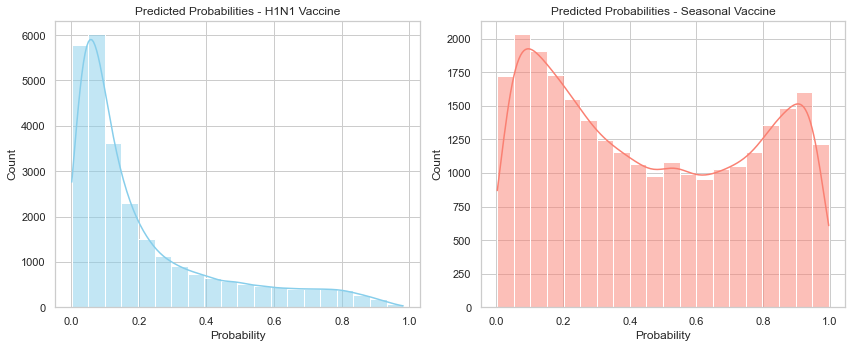

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot histograms
plt.figure(figsize=(12,5))

# h1n1_vaccine probabilities
plt.subplot(1, 2, 1)
sns.histplot(submission['h1n1_vaccine'], bins=20, kde=True, color='skyblue')
plt.title('Predicted Probabilities - H1N1 Vaccine')
plt.xlabel('Probability')
plt.ylabel('Count')

# seasonal_vaccine probabilities
plt.subplot(1, 2, 2)
sns.histplot(submission['seasonal_vaccine'], bins=20, kde=True, color='salmon')
plt.title('Predicted Probabilities - Seasonal Vaccine')
plt.xlabel('Probability')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
